In [1]:
import numpy as np
import matplotlib.pyplot as plt

# **1. Вычисление дискретного преобразования Фурье**

In [2]:
def compute_fft(x, dt):
    N = len(x)
    X = np.fft.fft(x) * dt  # масштабирование для приближения интеграла
    freq = np.fft.fftfreq(N, d=dt)
    # Сдвигаем нулевую частоту к центру
    X_shift = np.fft.fftshift(X)
    freq_shift = np.fft.fftshift(freq)

    return freq_shift, np.abs(X_shift)

# **2. Апериодические сигналы**

## **2.1. Прямоугольный импульс**

In [3]:
def rect_pulse(t, T, A):
    # Функция возвращает A при |t|<=T/2, иначе 0
    return np.where(np.abs(t) <= T/2, A, 0)

## **2.2. Гауссов импульс**

In [4]:
def gauss_pulse(t, A, t0, sigma):
    return A * np.exp(- ((t - t0)**2) / (2 * sigma**2))

## **2.3. Экспоненциально затухающая функция**

In [5]:
def exp_pulse(t, A, alpha):
    return np.where(t >= 0, A*np.exp(-alpha * t), 0)

## **2.4. Импульс sinc-функции**

In [6]:
def sinc_pulse(t, A, T):
    return A * np.sin(np.pi*t/T)/(np.pi*t/T)

## **2.5. Треугольный импульс**

In [7]:
def triangle_pulse(t, A, T):
    return np.where(np.abs(t) <= T/2, A*(1 - 2*np.abs(t)/T), 0)

## **2.6.  Функция для построения графика во временной области и спектра**

In [8]:
def plot_signal_and_spectrum(t, x, title=""):
    dt = t[1] - t[0]
    freq, X_mag = compute_fft(x, dt)

    # График во временной области
    plt.figure(figsize=(8, 6))
    plt.plot(t, x)
    plt.xlabel("Время")
    plt.ylabel("Амплитуда")
    plt.title(title + " во временной области")
    plt.grid(True)

    # График амплитудного спектра
    plt.figure(figsize=(8, 6))
    plt.plot(freq, X_mag)
    plt.xlabel("Частота")
    plt.ylabel("Амплитуда")
    plt.title(title + " амплитудный спектр")
    plt.grid(True)
    plt.xlim(-10, 10)
    plt.show()

# **3. Построeние огибающие и амплитудный спектр для каждого сигнала**

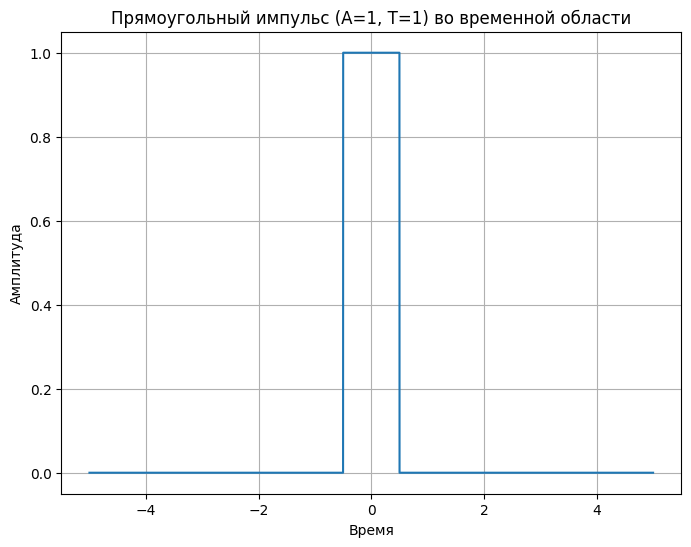

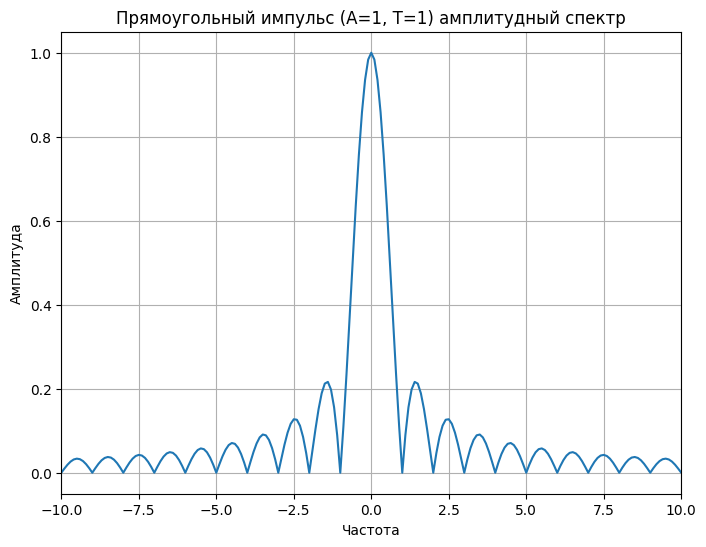

In [9]:
A, T1 = 1, 1
t_rect = np.linspace(-5, 5, 10000)
x_rect = rect_pulse(t_rect, T1, A)
plot_signal_and_spectrum(t_rect, x_rect, title="Прямоугольный импульс (A=1, T=1)")

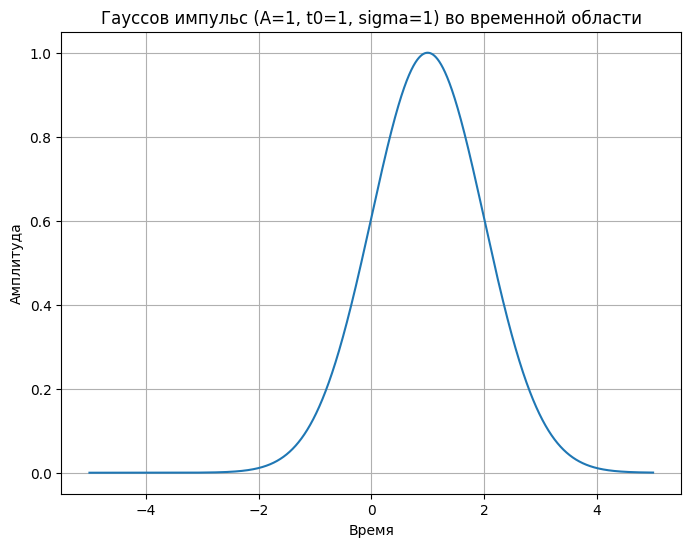

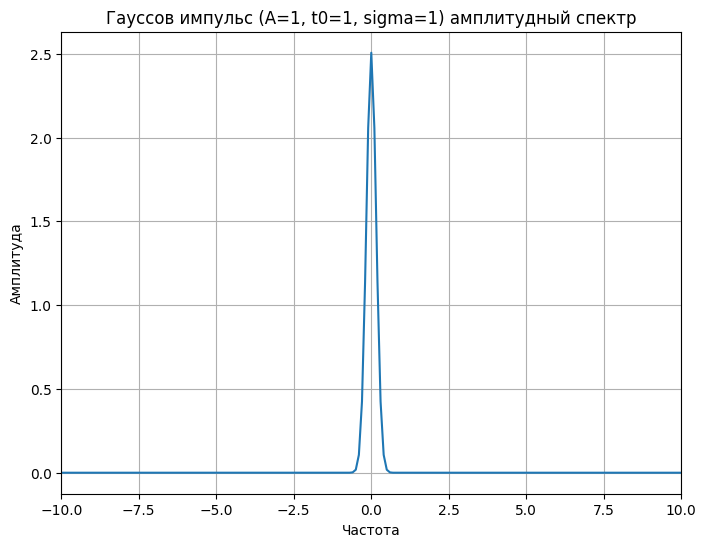

In [10]:
A2, t02, sigma2 = 1, 1, 1
t_gauss = np.linspace(-5, 5, 10000)
x_gauss = gauss_pulse(t_gauss, A2, t02, sigma2)
plot_signal_and_spectrum(t_gauss, x_gauss, "Гауссов импульс (A=1, t0=1, sigma=1)")

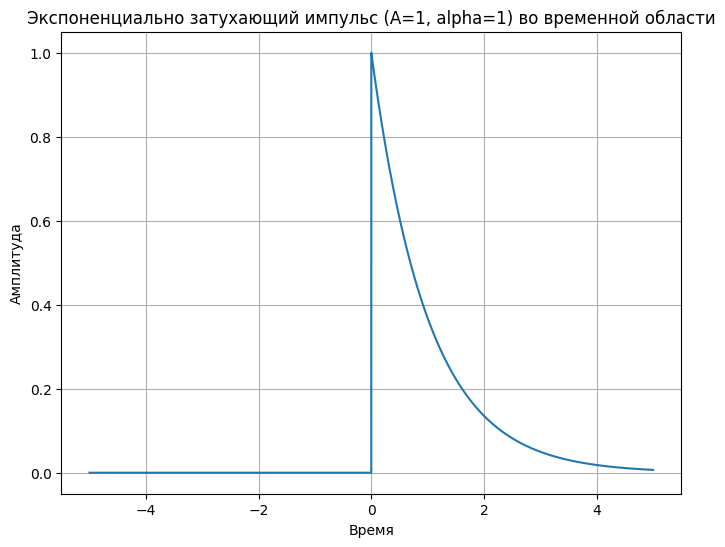

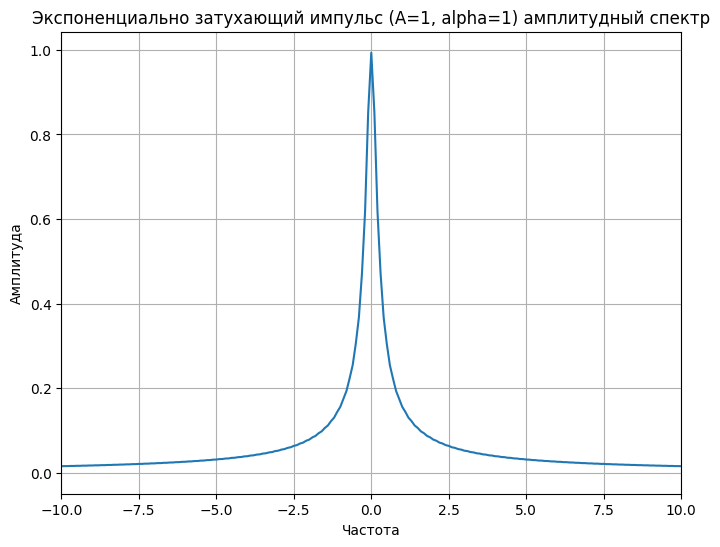

In [11]:
A, alpha3 = 1, 1
t_exp = np.linspace(-5, 5, 10000)
x_exp = exp_pulse(t_exp, A, alpha3)
plot_signal_and_spectrum(t_exp, x_exp, "Экспоненциально затухающий импульс (A=1, alpha=1)")

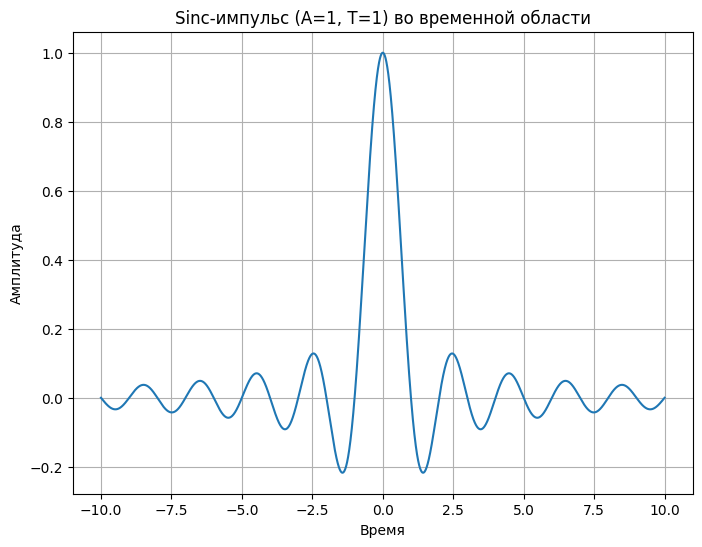

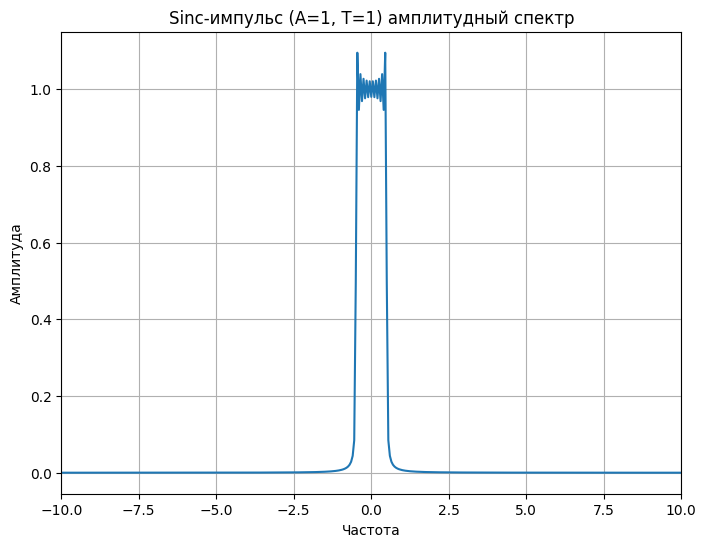

In [12]:
A4, T4 = 1, 1
t_sinc = np.linspace(-10, 10, 10000)
x_sinc = sinc_pulse(t_sinc, A4, T4)
plot_signal_and_spectrum(t_sinc, x_sinc, "Sinc-импульс (A=1, T=1)")

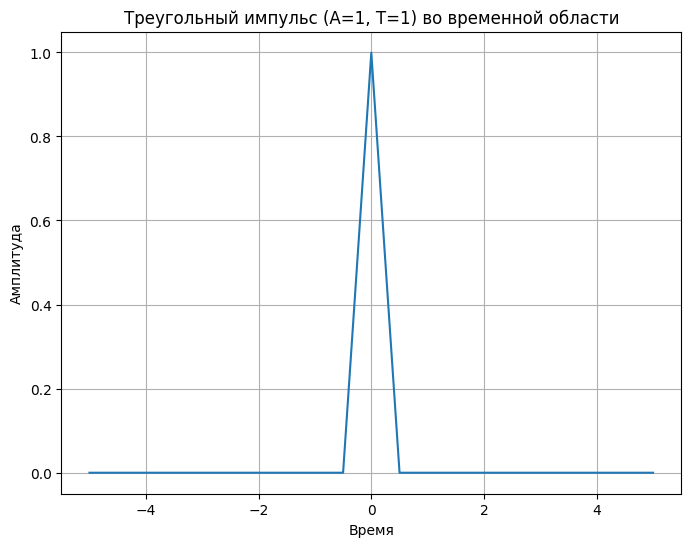

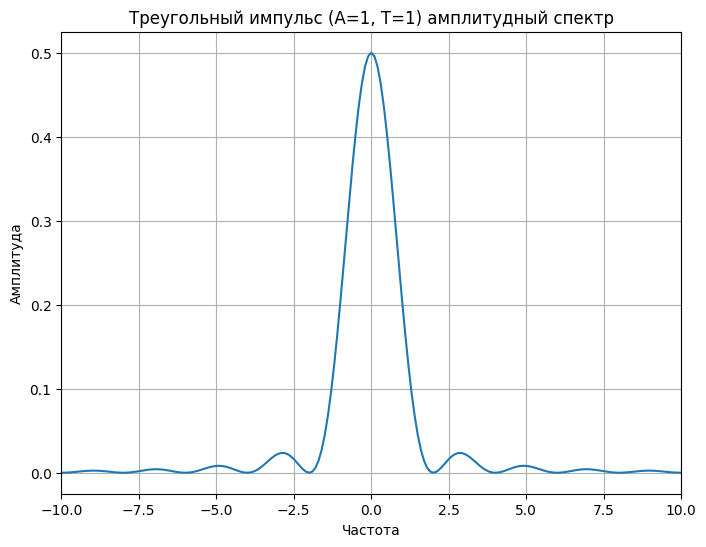

In [13]:
A5, T5 = 1, 1
t_tri = np.linspace(-5, 5, 10000)
x_tri = triangle_pulse(t_tri, A5, T5)
plot_signal_and_spectrum(t_tri, x_tri, "Треугольный импульс (A=1, T=1)")

# **4. Анализ влияния параметров (длительности, амплитуды и формы сигналов)**

In [14]:
def plot_parameter_variation(signal_func, t, param_name, param_values, fixed_params, xlabel, title=""):
    dt = t[1] - t[0]

    # Time-domain plot
    plt.figure(figsize=(12, 8))
    plt.subplot(2, 1, 1)
    for val in param_values:
        params = fixed_params.copy()
        params[param_name] = val
        x = signal_func(t, **params)
        plt.plot(t, x, label=f"{param_name}={val}")
    plt.xlabel("Время")
    plt.ylabel("Амплитуда")
    plt.title(title + f" во временной области при варьировании {param_name}")
    plt.legend()
    plt.grid(True)
    plt.xlim(-10, 10)

    # Frequency-domain plot
    plt.subplot(2, 1, 2)
    for val in param_values:
        params = fixed_params.copy()
        params[param_name] = val
        x = signal_func(t, **params)
        freq, X_mag = compute_fft(x, dt)
        plt.plot(freq, X_mag, label=f"{param_name}={val}")
    plt.xlabel(xlabel)
    plt.ylabel("Амплитуда")
    plt.title(title + f" амплитудный спектр при варьировании {param_name}")
    plt.legend()
    plt.grid(True)
    plt.xlim(-10, 10)

    plt.tight_layout()
    plt.show()

In [15]:
M = 4
N = 5

## **4.1. Прямоугольный импульс**

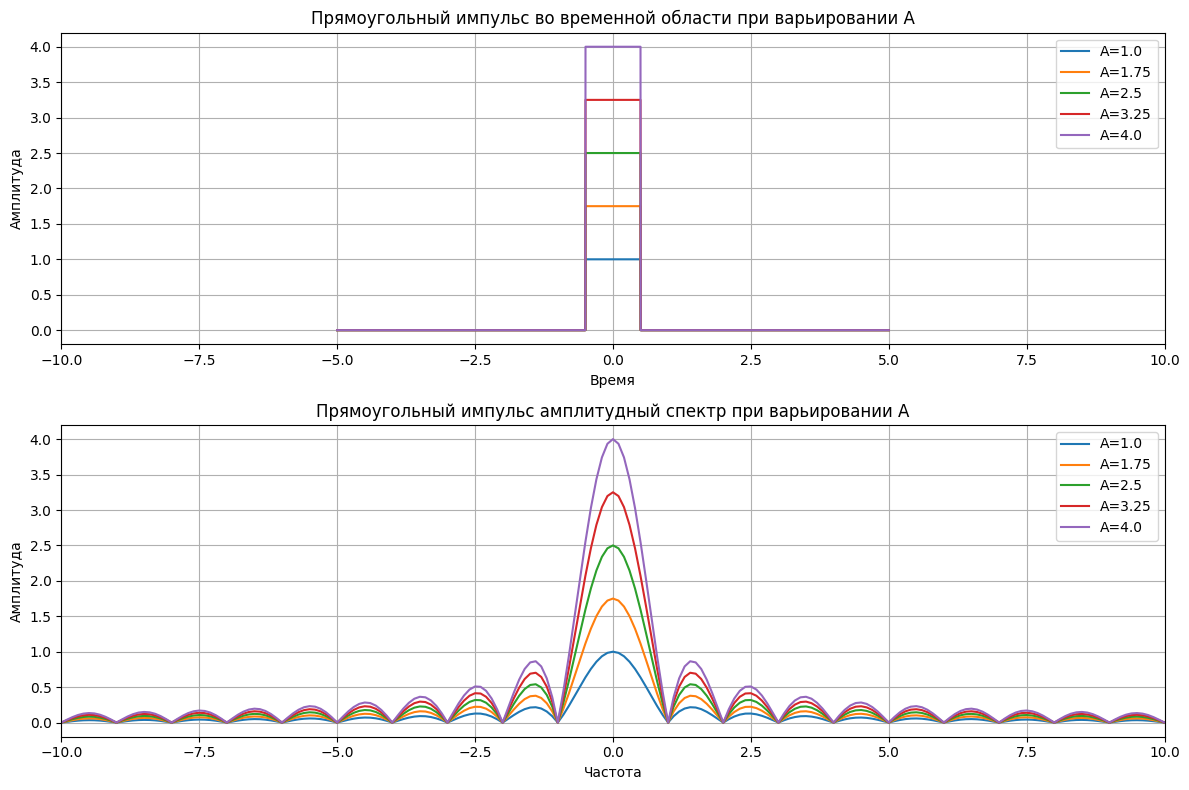

In [16]:
A_vals = np.linspace(1, M, N)
fixed_params = {"T": 1}
plot_parameter_variation(rect_pulse, t_rect, "A", A_vals, fixed_params,
                         xlabel="Частота",
                         title="Прямоугольный импульс")

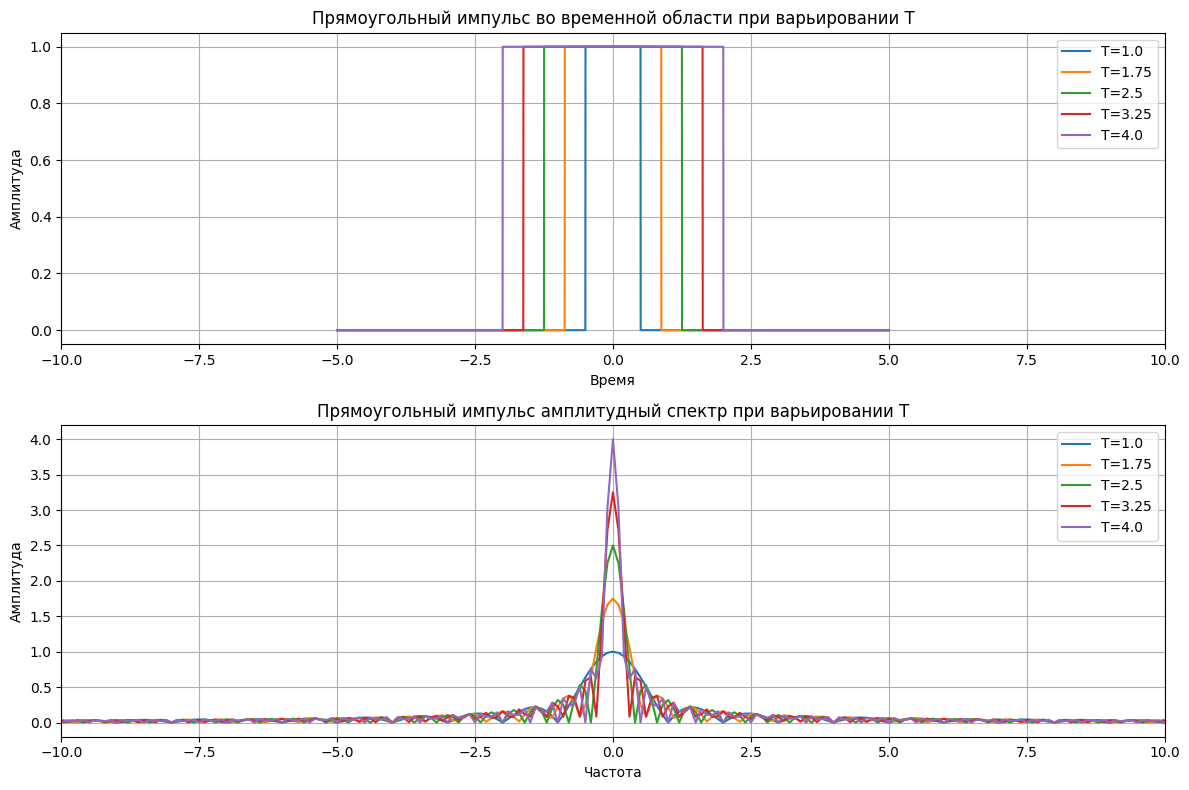

In [17]:
T_vals = np.linspace(1, M, N)
fixed_params = {"A": 1}
plot_parameter_variation(rect_pulse, t_rect, "T", T_vals, fixed_params,
                         xlabel="Частота",
                         title="Прямоугольный импульс")

## **4.2. Гауссов импульс**

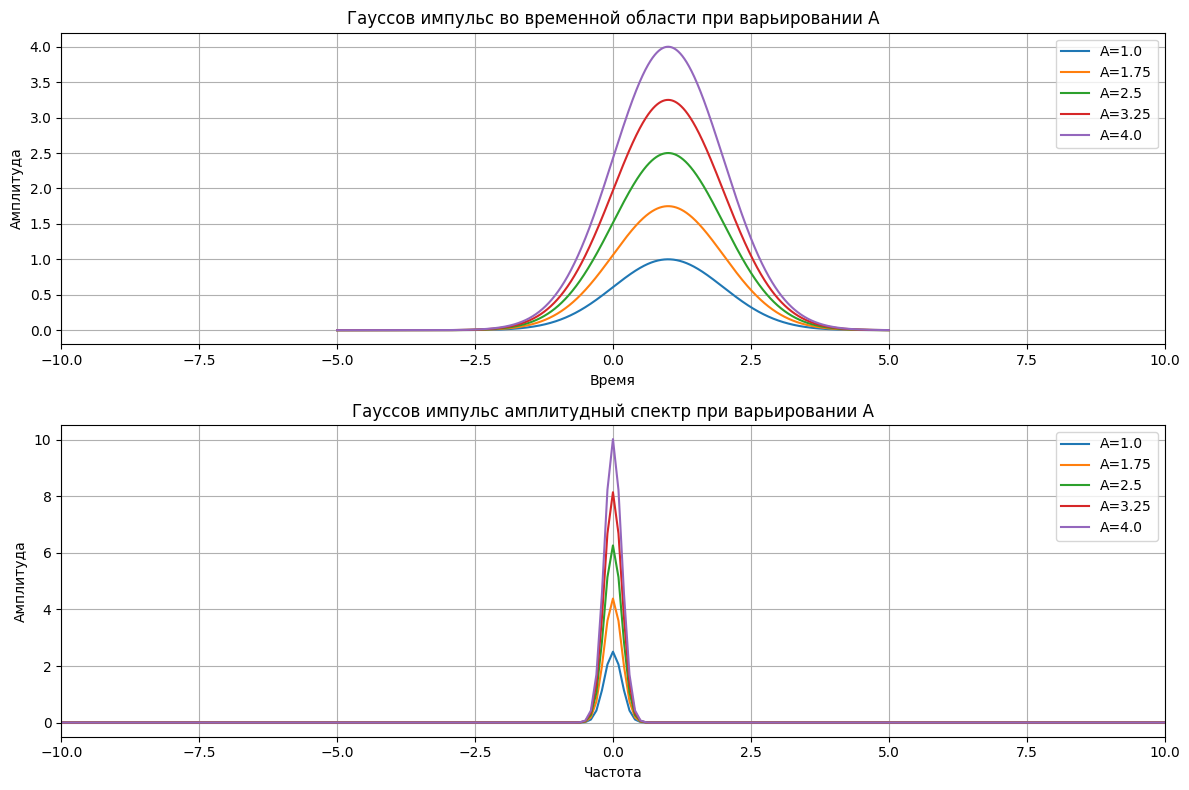

In [18]:
A_vals = np.linspace(1, M, N)
fixed_params = {"t0": 1, "sigma": 1}  # остальные остаются равными 1
plot_parameter_variation(gauss_pulse, t_gauss, "A", A_vals, fixed_params,
                         xlabel="Частота",
                         title="Гауссов импульс")

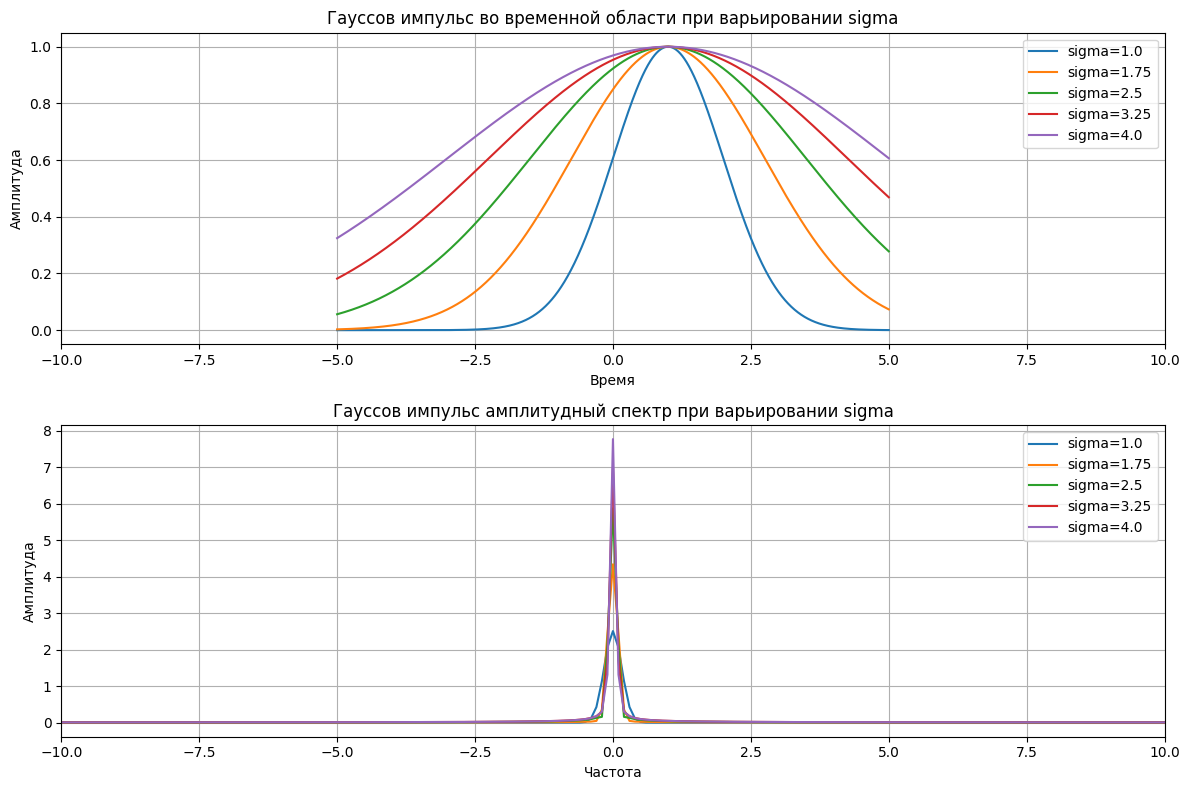

In [19]:
sigma_vals = np.linspace(1, M, N)
fixed_params = {"A": 1, "t0": 1}
plot_parameter_variation(gauss_pulse, t_gauss, "sigma", sigma_vals, fixed_params,
                         xlabel="Частота",
                         title="Гауссов импульс")

## **4.3. Экспоненциально затухающий импульс**

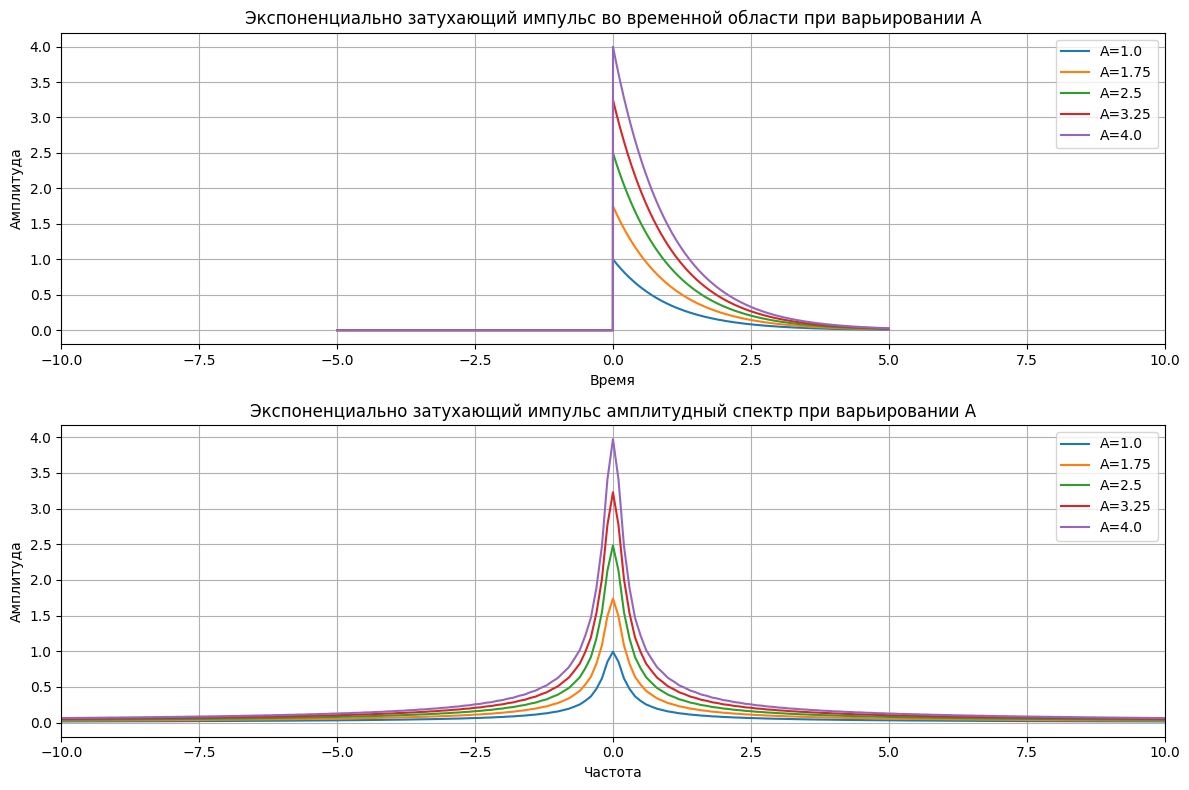

In [20]:
A_vals = np.linspace(1, M, N)
fixed_params = {"alpha": 1}  # остальные остаются равными 1
plot_parameter_variation(exp_pulse, t_exp, "A", A_vals, fixed_params,
                         xlabel="Частота",
                         title="Экспоненциально затухающий импульс")

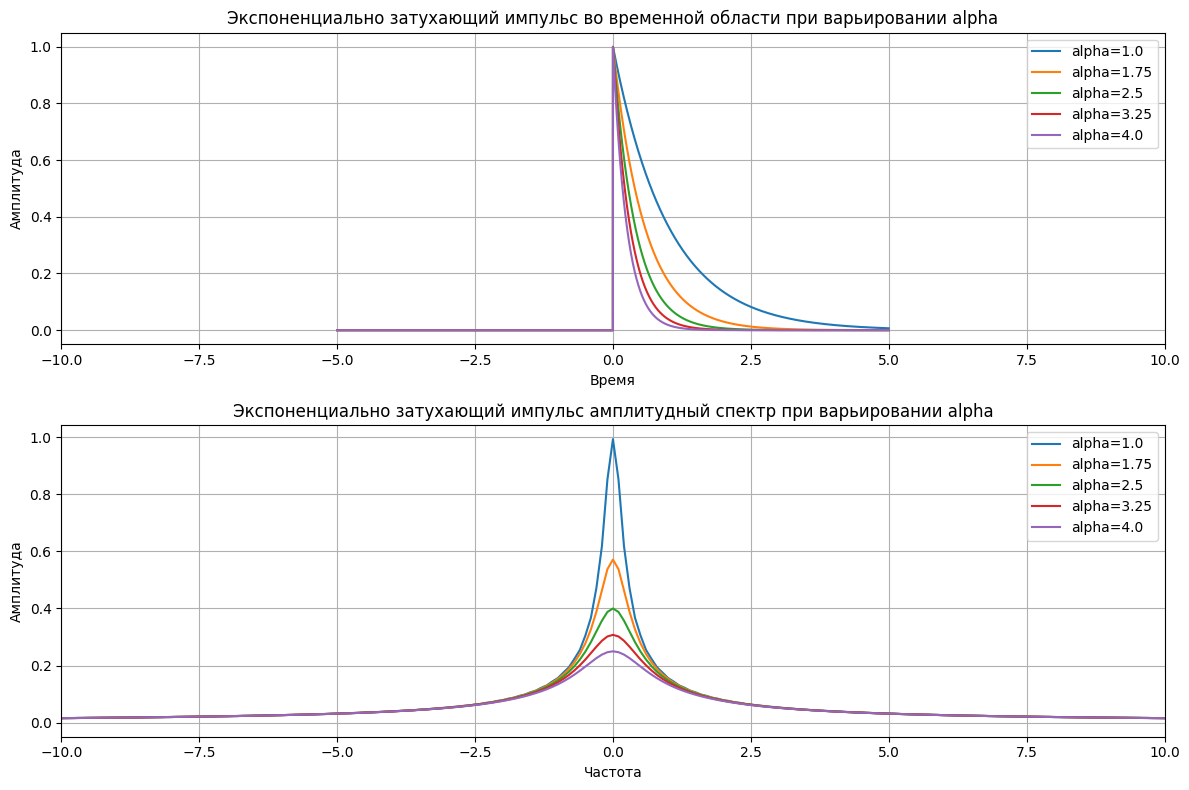

In [21]:
Alpha_vals = np.linspace(1, M, N)
fixed_params = {"A": 1}
plot_parameter_variation(exp_pulse, t_exp, "alpha", Alpha_vals, fixed_params,
                            xlabel="Частота",
                            title="Экспоненциально затухающий импульс")

## **4.4. Sinc-импульс**

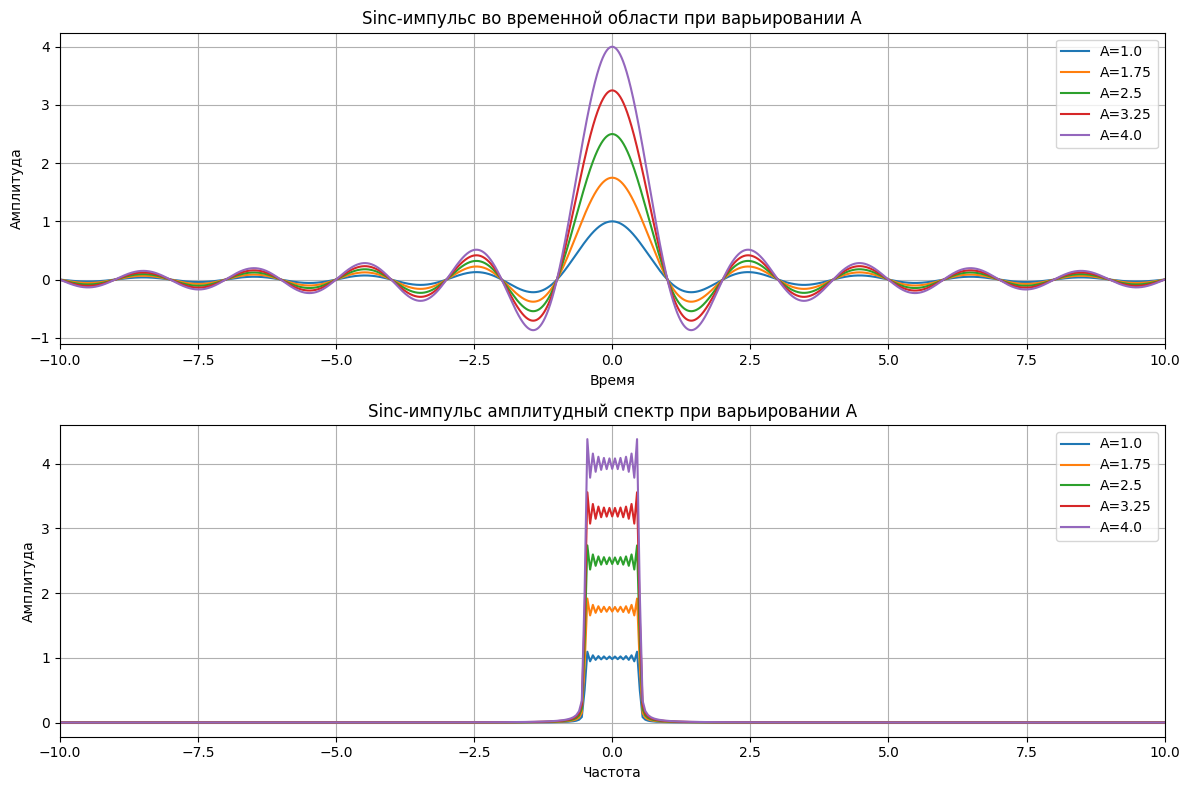

In [22]:
A_vals = np.linspace(1, M, N)
fixed_params = {"T": 1}
plot_parameter_variation(sinc_pulse, t_sinc, "A", A_vals, fixed_params,
                         xlabel="Частота",
                         title="Sinc-импульс")

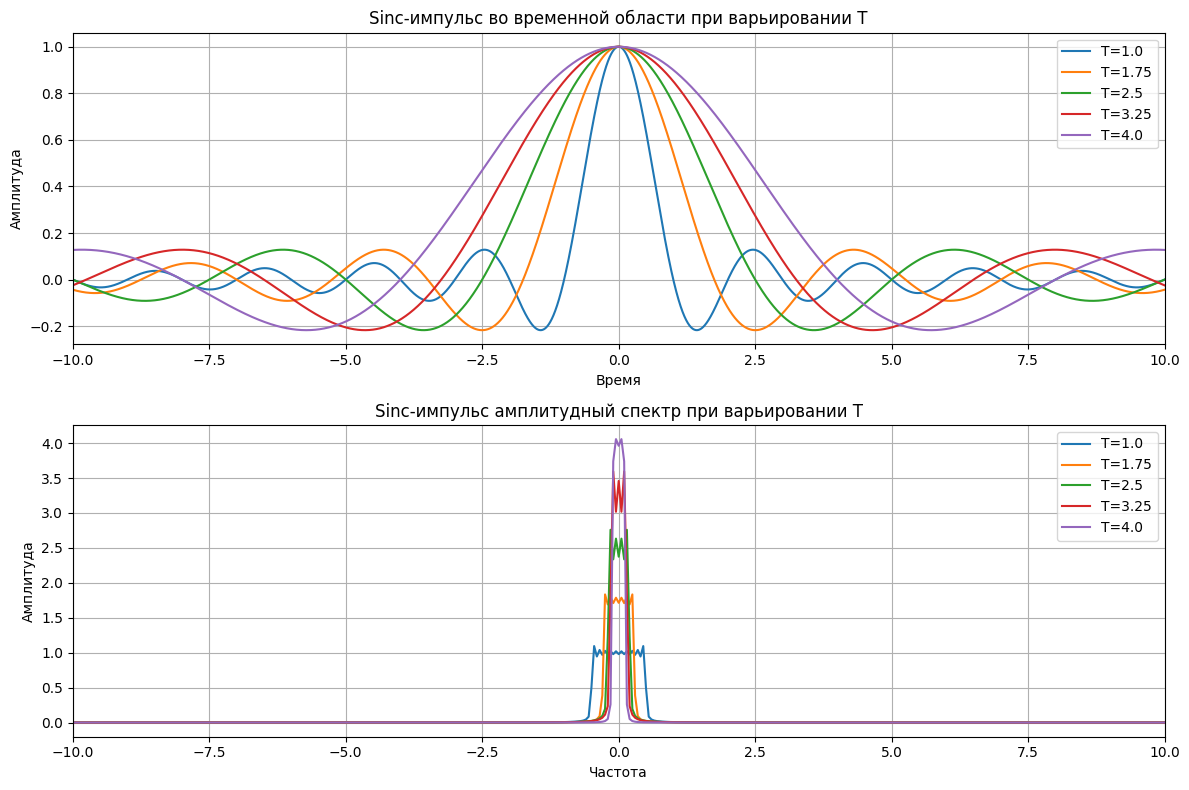

In [23]:
T_vals = np.linspace(1, M, N)
fixed_params = {"A": 1}
plot_parameter_variation(sinc_pulse, t_sinc, "T", T_vals, fixed_params,
                         xlabel="Частота",
                         title="Sinc-импульс")

## **4.5. Треугольный импульс**

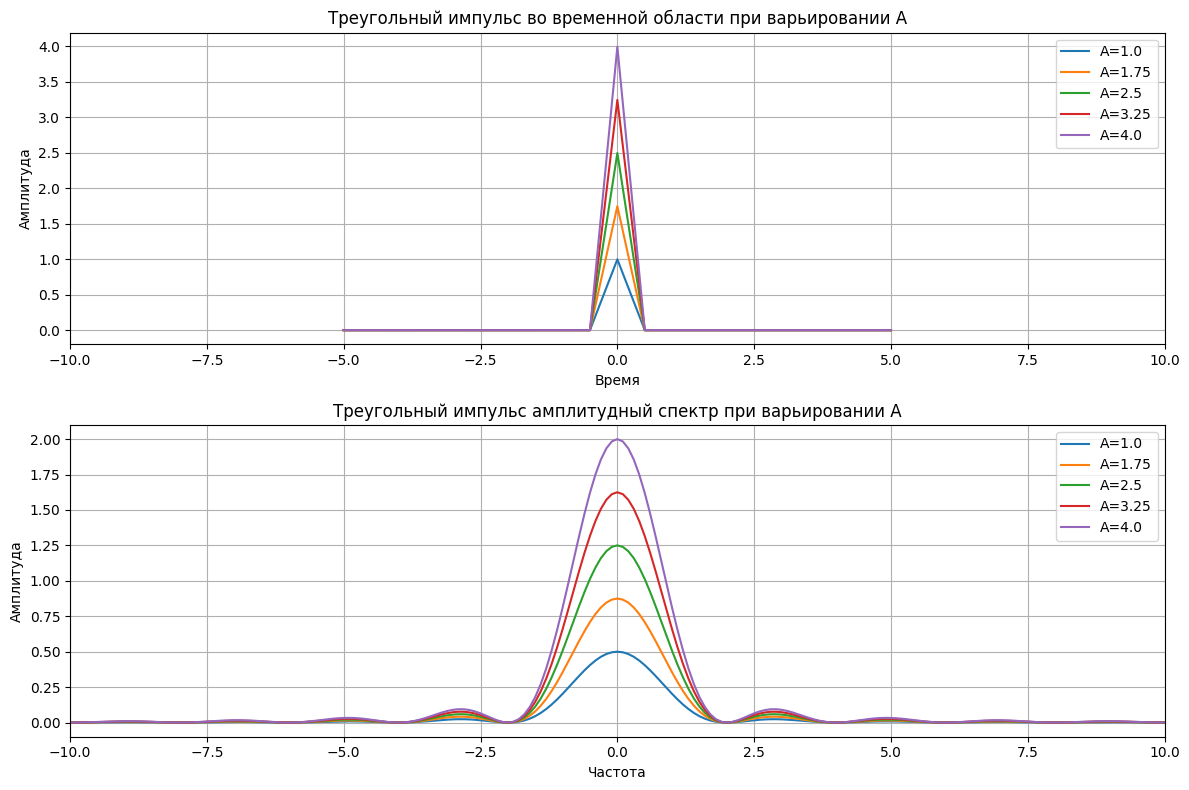

In [24]:
A_vals = np.linspace(1, M, N)
fixed_params = {"T": 1}
plot_parameter_variation(triangle_pulse, t_tri, "A", A_vals, fixed_params,
                         xlabel="Частота",
                         title="Треугольный импульс")

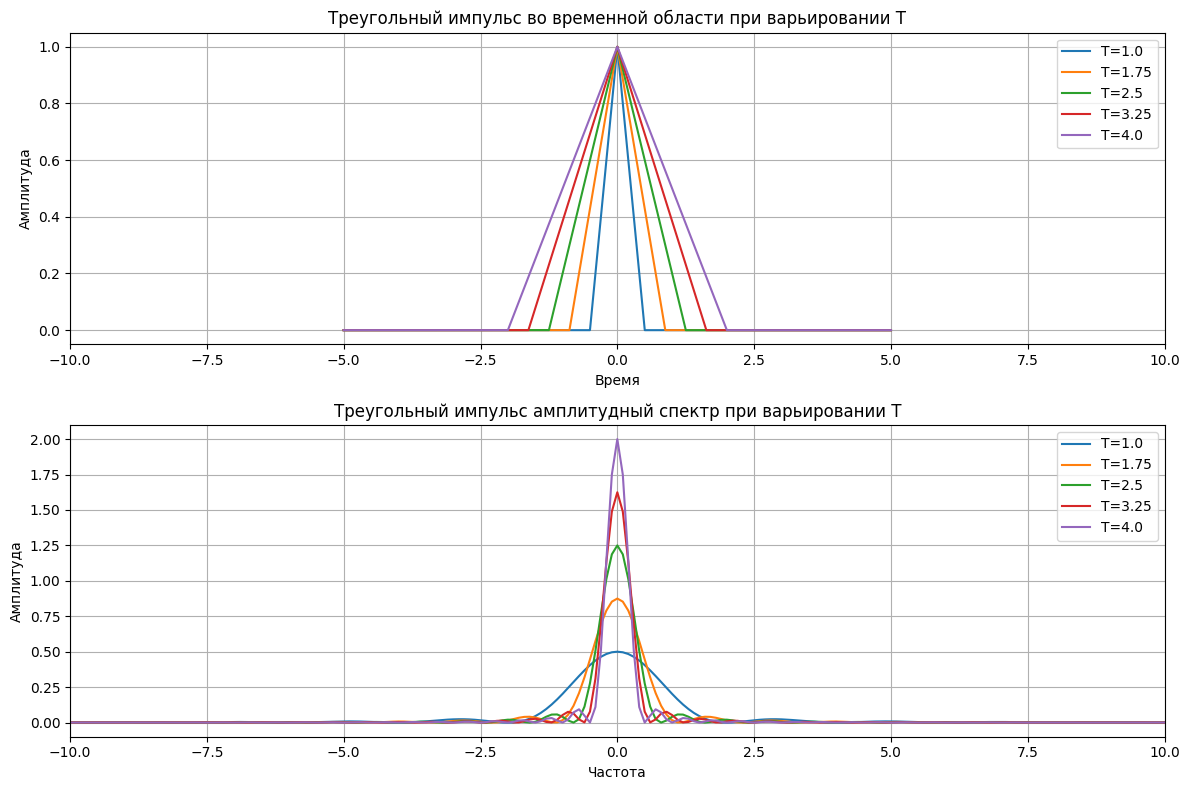

In [25]:
T_vals = np.linspace(1, M, N)
fixed_params = {"A": 1}
plot_parameter_variation(triangle_pulse, t_tri, "T", T_vals, fixed_params,
                         xlabel="Частота",
                         title="Треугольный импульс")

# **5. Выводы**

1. **Прямоугольный импульс (Третий сигнал)**:  
   Этот сигнал используется в микросхемах и цифровых системах, потому что сразу видно, где 0, а где 1. Однако, из-за резких скачков между 0 и 1, в сигнале возникают высокие частоты, что приводит к потерям и необходимости фильтрации высокочастотных составляющих. Поэтому прямоугольный импульс не используется в других системах, кроме цифровых.

2. **Гауссов импульс (Второй сигнал)**:  
   Гауссов сигнал идеально подходит для передачи информации без помех, потому что он плавный и симметричный. Для этого сигнала необходимо подобрать параметр sigma: чем меньше sigma, тем ниже затраты, но больше помех; наоборот, при большем sigma помех будет меньше, но это приведет к увеличению затрат.

3. **Экспоненциально затухающий импульс (Третий сигнал)**:  
   Короткий затухающий импульс широко используется в радарах (для определения дальности, основанной на времени затухания) и в других системах, таких как датчики или аудиопередача. Его легко отличить от других сигналов, и чем больше коэффициент alpha, тем быстрее импульс затухает.

4. **Sinc-импульс (Четвертый сигнал)**:  
   Sinc-импульс обладает основным и дополнительными лепестками, и он не вызывает интерференции, так как обнуляется в нужные моменты времени. Это позволяет избежать наложения сигналов, что делает его идеальным для телекоммуникационных систем, где важно избегать помех между последовательными сигналами.

5. **Треугольный импульс (Пятый сигнал)**:  
   Треугольный импульс используется в тестировании оборудования, так как любые искажения сразу заметны. Это позволяет быстро обнаружить неисправности или отклонения в работе системы.